In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense,LSTM, Dropout
import math

In [2]:
df = pd.read_csv('Downloads/petr4_treinamento.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Downloads/petr4_treinamento.csv'

In [ ]:
for coluna in df.columns:
    if df[coluna].dtype == 'float64':
        if df[coluna].isna().any():
            media = df[coluna].mean()
            df[coluna].fillna(media, inplace=True)

In [3]:
treino = df.iloc[:, 1:2].values
treino

NameError: name 'df' is not defined

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

treino = scaler.fit_transform(treino)

In [82]:
x_train = []  
y_train = []  
timestamp = 90

In [17]:
# Criando as sequências de entrada (x_treino) e os valores de saída (y_treino)
for i in range(timestamp, len(treino)):
    # Cria uma sequência de entrada com base na janela de tempo deslizante
    # A sequência contém os valores de treino a partir de i - timestamp até i (exclusivo)
    x_train.append(treino[i - timestamp:i, 0])
     # O valor de saída correspondente é o valor de treino no índice i
    y_train.append(treino[i, 0])

In [18]:
# Converte as listas em arrays numpy
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train

array([[0.76501938, 0.7562984 , 0.78149225, ..., 0.77325581, 0.7562984 ,
        0.74273261],
       [0.7562984 , 0.78149225, 0.78875969, ..., 0.7562984 , 0.74273261,
        0.74127907],
       [0.78149225, 0.78875969, 0.77083338, ..., 0.74273261, 0.74127907,
        0.74224806],
       ...,
       [0.46414729, 0.46414729, 0.46850775, ..., 0.55959302, 0.55959302,
        0.55959302],
       [0.46414729, 0.46850775, 0.47141473, ..., 0.55959302, 0.55959302,
        0.57122093],
       [0.46850775, 0.47141473, 0.46317829, ..., 0.55959302, 0.57122093,
        0.57655039]])

In [21]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.76501938],
        [0.7562984 ],
        [0.78149225],
        ...,
        [0.77325581],
        [0.7562984 ],
        [0.74273261]],

       [[0.7562984 ],
        [0.78149225],
        [0.78875969],
        ...,
        [0.7562984 ],
        [0.74273261],
        [0.74127907]],

       [[0.78149225],
        [0.78875969],
        [0.77083338],
        ...,
        [0.74273261],
        [0.74127907],
        [0.74224806]],

       ...,

       [[0.46414729],
        [0.46414729],
        [0.46850775],
        ...,
        [0.55959302],
        [0.55959302],
        [0.55959302]],

       [[0.46414729],
        [0.46850775],
        [0.47141473],
        ...,
        [0.55959302],
        [0.55959302],
        [0.57122093]],

       [[0.46850775],
        [0.47141473],
        [0.46317829],
        ...,
        [0.55959302],
        [0.57122093],
        [0.57655039]]])

In [28]:
from keras.models import Sequential


model = Sequential()

model.add(LSTM(120, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(80, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer = 'rmsprop', loss ='mean_squared_error', metrics = 'mean_squared_error')

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 90, 120)           58560     
                                                                 
 dropout_16 (Dropout)        (None, 90, 120)           0         
                                                                 
 lstm_17 (LSTM)              (None, 90, 100)           88400     
                                                                 
 dropout_17 (Dropout)        (None, 90, 100)           0         
                                                                 
 lstm_18 (LSTM)              (None, 90, 80)            57920     
                                                                 
 dropout_18 (Dropout)        (None, 90, 80)            0         
                                                                 
 lstm_19 (LSTM)              (None, 50)               

In [30]:
model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
37/37 [==============================] - 86s 2s/step - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 2/100
37/37 [==============================] - 72s 2s/step - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 3/100
37/37 [==============================] - 90s 2s/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 4/100
37/37 [==============================] - 86s 2s/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 5/100
37/37 [==============================] - 99s 3s/step - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 6/100
37/37 [==============================] - 96s 3s/step - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 7/100
37/37 [==============================] - 69s 2s/step - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 8/100
37/37 [==============================] - 73s 2s/step - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 9/100
37/37 [==============================] - 81s 2s/step - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 10/100
37/37 

In [84]:
base_teste = pd.read_csv('Downloads/petr4_teste.csv')
base_teste.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.190001,16.549999,16.190001,16.549999,16.516966,33461800
1,2018-01-03,16.490000,16.719999,16.370001,16.700001,16.666668,55940900
2,2018-01-04,16.780001,16.959999,16.620001,16.730000,16.696608,37064900
3,2018-01-05,16.700001,16.860001,16.570000,16.830000,16.796408,26958200
4,2018-01-08,16.740000,17.030001,16.709999,17.030001,16.996010,28400000


In [85]:
y_teste = base_teste.iloc[: , 1:2].values
y_teste

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [53]:
base_completa = pd.concat((df['Open'], base_teste['Open']), axis = 0)
base_completa

0     19.990000
1     19.809999
2     20.330000
3     20.480000
4     20.110001
        ...    
17    19.340000
18    19.620001
19    19.670000
20    19.770000
21    19.740000
Name: Open, Length: 1267, dtype: float64

In [89]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas

array([13.93    , 13.76    , 13.79    , 13.53    , 13.85    , 13.96    ,
       14.57    , 14.65    , 15.02    , 15.1     , 14.88    , 14.98    ,
       14.94    , 15.03    , 15.07    , 15.02    , 15.1     , 15.25    ,
       15.85    , 15.6     , 15.79    , 15.86    , 15.7     , 15.37    ,
       15.5     , 15.19    , 15.6     , 15.9     , 15.88    , 15.66    ,
       15.61    , 16.129999, 16.17    , 16.08    , 16.23    , 16.16    ,
       16.139999, 16.219999, 16.      , 16.190001, 16.290001, 16.290001,
       16.530001, 16.780001, 16.77    , 16.969999, 16.9     , 16.99    ,
       16.9     , 16.959999, 17.049999, 17.309999, 16.690001, 16.889999,
       16.709999, 16.690001, 16.639999, 15.35    , 15.62    , 15.92    ,
       16.02    , 16.15    , 16.09    , 15.98    , 16.25    , 16.01    ,
       15.93    , 15.87    , 15.3     , 15.34    , 15.65    , 15.5     ,
       15.22    , 15.3     , 15.51    , 15.48    , 15.36    , 15.65    ,
       15.1     , 15.05    , 15.16    , 15.18    , 

In [60]:
entradas = entradas.reshape(-1,1)
entradas

array([[13.93    ],
       [13.76    ],
       [13.79    ],
       [13.53    ],
       [13.85    ],
       [13.96    ],
       [14.57    ],
       [14.65    ],
       [15.02    ],
       [15.1     ],
       [14.88    ],
       [14.98    ],
       [14.94    ],
       [15.03    ],
       [15.07    ],
       [15.02    ],
       [15.1     ],
       [15.25    ],
       [15.85    ],
       [15.6     ],
       [15.79    ],
       [15.86    ],
       [15.7     ],
       [15.37    ],
       [15.5     ],
       [15.19    ],
       [15.6     ],
       [15.9     ],
       [15.88    ],
       [15.66    ],
       [15.61    ],
       [16.129999],
       [16.17    ],
       [16.08    ],
       [16.23    ],
       [16.16    ],
       [16.139999],
       [16.219999],
       [16.      ],
       [16.190001],
       [16.290001],
       [16.290001],
       [16.530001],
       [16.780001],
       [16.77    ],
       [16.969999],
       [16.9     ],
       [16.99    ],
       [16.9     ],
       [16.959999],


In [61]:
entradas = scaler.transform(entradas)
entradas

array([[0.47141473],
       [0.46317829],
       [0.46463178],
       [0.45203488],
       [0.46753876],
       [0.47286822],
       [0.50242248],
       [0.50629845],
       [0.52422481],
       [0.52810078],
       [0.51744186],
       [0.52228682],
       [0.52034884],
       [0.5247093 ],
       [0.52664729],
       [0.52422481],
       [0.52810078],
       [0.53536822],
       [0.56443798],
       [0.55232558],
       [0.56153101],
       [0.56492248],
       [0.55717054],
       [0.54118217],
       [0.54748062],
       [0.53246124],
       [0.55232558],
       [0.56686047],
       [0.56589147],
       [0.55523256],
       [0.55281008],
       [0.57800383],
       [0.57994186],
       [0.5755814 ],
       [0.58284884],
       [0.57945736],
       [0.57848832],
       [0.58236429],
       [0.57170543],
       [0.5809109 ],
       [0.58575586],
       [0.58575586],
       [0.59738377],
       [0.60949617],
       [0.60901163],
       [0.6187015 ],
       [0.61531008],
       [0.619

In [65]:
x_test = []

length = len(entradas)

for i in range(timestamp, length):
    
    x_test.append(entradas[i - timestamp:i, 0])

x_test = np.array(x_test)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [77]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)
pred

1/1 [==============================] - 1s 1s/step


array([[16.383318],
       [16.472261],
       [16.575298],
       [16.733622],
       [16.89982 ],
       [17.03309 ],
       [17.161   ],
       [17.259644],
       [17.308205],
       [17.337685],
       [17.407368],
       [17.514647],
       [17.716995],
       [18.037342],
       [18.380947],
       [18.645742],
       [18.814178],
       [18.898657],
       [19.068363],
       [19.364483],
       [19.705048],
       [20.006948]], dtype=float32)

In [78]:
(pred - y_teste).mean()

-0.023424687572132574

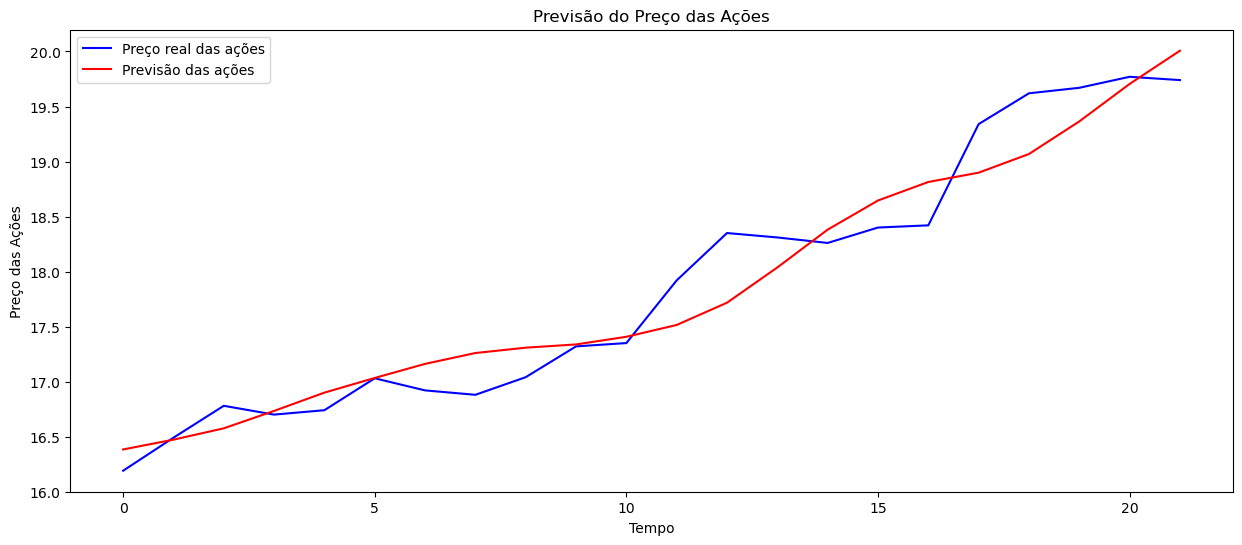

In [79]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 15, 6

plt.plot(y_teste, color='b', label='Preço real das ações')
plt.plot(pred, color='r', label='Previsão das ações')

plt.title('Previsão do Preço das Ações')
plt.xlabel('Tempo')
plt.ylabel('Preço das Ações')

plt.legend()


plt.show()